In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [55]:
#na_filters removes NA from the dataframe and adds blank for NA values
#parse_dates sets the datatype of columns to date time
#index_col sets the column speicified to the index
police_df = pd.read_csv('data/Police_Stop_Data.csv', index_col=0, na_filter=False, parse_dates=[2,18]) #Open Police Stop csv file


In [56]:
# get unique values from a column
police_df.citationIssued.unique()

array(['', 'NO', 'YES'], dtype=object)

In [57]:
# Updates blank value with NO
# police_df["citationIssued"].fillna('NO', inplace = True)

# Updates empty string to another value
# inplace=True modifies the underlying data.  If you need to keep the orginal copy of the dataframe than you need to assign your output to a new dataframe
police_df.citationIssued.replace('','NO', inplace=True)

# get unique values from a column
police_df.citationIssued.unique()

array(['NO', 'YES'], dtype=object)

In [58]:
#Cleaning up data for reason column
police_df.reason.unique()

array(['', 'Moving Violation', 'Equipment Violation', 'Citizen / 9-1-1',
       'Investigative'], dtype=object)

In [59]:
police_df.reason.replace('','Unknown',inplace=True)

police_df.reason.unique()

array(['Unknown', 'Moving Violation', 'Equipment Violation',
       'Citizen / 9-1-1', 'Investigative'], dtype=object)

In [60]:
# Clean up all of the empty strings in the strings columns
police_df.callDisposition.replace('','Unknown',inplace=True)
police_df.personSearch.replace('','Unknown',inplace=True)
police_df.vehicleSearch.replace('','Unknown',inplace=True)
police_df.preRace.replace('','Unknown',inplace=True)
police_df.race.replace('','Unknown',inplace=True)
police_df.gender.replace('','Unknown',inplace=True)
police_df.policePrecinct.replace('','Unknown',inplace=True)
police_df.neighborhood.replace('','Unknown',inplace=True)

In [61]:
# Show sample of the file
police_df.head()


,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
OBJECTID,,,,,,,,,,,,,,,,,,
1,16-395258,2016-10-31 22:40:47+00:00,Unknown,Suspicious Person (P),BKG-Booking,NO,YES,NO,Black,Black,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1,Downtown West,2017-08-08 10:25:31+00:00
2,16-395296,2016-10-31 23:06:36+00:00,Unknown,Traffic Law Enforcement (P),TAG-Tagged,NO,NO,NO,Unknown,Black,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5,Steven's Square - Loring Heights,2017-08-08 10:26:13+00:00
3,16-395326,2016-10-31 23:20:54+00:00,Unknown,Attempt Pick-Up (P),RFD-Refused,NO,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4,Webber - Camden,2017-08-08 10:24:35+00:00
4,16-395328,2016-10-31 23:23:20+00:00,Unknown,Suspicious Person (P),BKG-Booking,NO,YES,NO,Black,Black,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3,Corcoran,2017-08-08 10:25:31+00:00
5,16-395333,2016-10-31 23:26:05+00:00,Unknown,Suspicious Vehicle (P),GOA-Gone on Arrival,NO,NO,NO,Other,Unknown,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3,Hale,2017-08-08 10:25:03+00:00


In [62]:
# get the number of rows and number of columns in the dataframe returns count of (rows, columns)
police_df.shape

(190054, 18)

In [63]:
# get statistics information about the dataframe this only returns data for numeric columns
police_df.describe()

,lat,long,x,y
count,190054.000000,190054.000000,1.900540e+05,1.900540e+05
mean,44.597435,-92.487240,-1.029563e+07,5.570447e+06
std,4.106831,8.516637,9.480677e+05,5.129727e+05
min,0.000000,-93.329154,-1.038935e+07,0.000000e+00
25%,44.950635,-93.289260,-1.038491e+07,5.613753e+06
50%,44.977180,-93.274317,-1.038325e+07,5.617930e+06
75%,44.999141,-93.252400,-1.038081e+07,5.621387e+06
max,45.051240,0.000000,0.000000e+00,5.629593e+06


In [64]:
# get statistics information about the dataframe for object data types "strings"
police_df.describe(include=object)

,masterIncidentNumber,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,policePrecinct,neighborhood
count,190054,190054,190054,190054,190054,190054,190054,190054,190054,190054,190054,190054
unique,190053,5,6,30,2,3,3,8,8,4,6,88
top,21-222454,Citizen / 9-1-1,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Unknown,Male,4,Downtown West
freq,2,53570,85685,73329,170906,147311,154725,137898,70677,100104,46194,17063


In [65]:
# display the data types in the dataframe
police_df.dtypes

masterIncidentNumber                 object
responseDate            datetime64[ns, UTC]
reason                               object
problem                              object
callDisposition                      object
citationIssued                       object
personSearch                         object
vehicleSearch                        object
preRace                              object
race                                 object
gender                               object
lat                                 float64
long                                float64
x                                   float64
y                                   float64
policePrecinct                       object
neighborhood                         object
lastUpdateDate          datetime64[ns, UTC]
dtype: object

In [66]:
#Set the data types of the other strings
str_list = ['reason','problem','callDisposition','citationIssued','personSearch','vehicleSearch','preRace','race','gender','neighborhood']

for val in str_list:
    police_df[val] = police_df[val].astype(str)

police_df.dtypes

masterIncidentNumber                 object
responseDate            datetime64[ns, UTC]
reason                               object
problem                              object
callDisposition                      object
citationIssued                       object
personSearch                         object
vehicleSearch                        object
preRace                              object
race                                 object
gender                               object
lat                                 float64
long                                float64
x                                   float64
y                                   float64
policePrecinct                       object
neighborhood                         object
lastUpdateDate          datetime64[ns, UTC]
dtype: object

In [67]:
# Sample Query of the dataframe
police_df.query('race == "Black" and gender == "Female"')

,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
OBJECTID,,,,,,,,,,,,,,,,,,
32,16-395570,2016-11-01 03:14:24+00:00,Unknown,Traffic Law Enforcement (P),TAG-Tagged,NO,NO,NO,Black,Black,Female,45.003130,-93.308203,-1.038702e+07,5.622014e+06,4,Willard - Hay,2017-08-08 10:26:13+00:00
83,16-395976,2016-11-01 13:32:41+00:00,Unknown,Traffic Law Enforcement (P),TAG-Tagged,NO,NO,NO,Black,Black,Female,44.999160,-93.295640,-1.038562e+07,5.621389e+06,4,Near - North,2017-08-08 10:25:31+00:00
101,16-396117,2016-11-01 16:06:32+00:00,Unknown,Suspicious Person (P),AOK- All OK,NO,NO,NO,Black,Black,Female,44.948369,-93.239479,-1.037937e+07,5.613397e+06,3,East Phillips,2017-08-08 10:26:13+00:00
103,16-396138,2016-11-01 16:28:29+00:00,Unknown,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Black,Female,44.998760,-93.307580,-1.038695e+07,5.621326e+06,4,Willard - Hay,2017-08-08 10:26:13+00:00
124,16-396595,2016-11-01 22:53:43+00:00,Unknown,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Black,Female,44.960930,-93.251718,-1.038073e+07,5.615373e+06,3,Ventura Village,2017-08-08 10:26:13+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189903,22-081702,2022-04-19 16:46:49+00:00,Investigative,Suspicious Person (P),SNT-Sent,NO,NO,NO,Unknown,Black,Female,44.948367,-93.296378,-1.038571e+07,5.613397e+06,5,Lowry Hill East,2022-04-20 08:20:36+00:00
189925,22-082144,2022-04-20 06:09:28+00:00,Equipment Violation,Traffic Law Enforcement (P),ADV-Advised,NO,NO,NO,Unknown,Black,Female,45.002026,-93.280211,-1.038391e+07,5.621840e+06,4,Hawthorne,2022-04-21 08:20:45+00:00
189979,22-083053,2022-04-21 10:26:09+00:00,Citizen / 9-1-1,Suspicious Vehicle (P),ADV-Advised,NO,NO,NO,Black,Black,Female,44.949214,-93.255038,-1.038110e+07,5.613530e+06,3,Midtown Phillips,2022-04-22 08:20:32+00:00


In [68]:
# Create a copy of the dataframe so we can drop columns from the dataframe that we don't need we will make a deep copy
pol_df = police_df.copy()

In [69]:
#Delete columns from the dataframe.  axis = 1 means drop the column 0 would mean drop the row
pol_df.drop(['masterIncidentNumber','x','y','lastUpdateDate'], axis = 1,inplace=True)

#show the updated dataframe
pol_df.head()

,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
OBJECTID,,,,,,,,,,,,,,
1,2016-10-31 22:40:47+00:00,Unknown,Suspicious Person (P),BKG-Booking,NO,YES,NO,Black,Black,Male,44.979570,-93.272570,1,Downtown West
2,2016-10-31 23:06:36+00:00,Unknown,Traffic Law Enforcement (P),TAG-Tagged,NO,NO,NO,Unknown,Black,Male,44.962689,-93.275921,5,Steven's Square - Loring Heights
3,2016-10-31 23:20:54+00:00,Unknown,Attempt Pick-Up (P),RFD-Refused,NO,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,4,Webber - Camden
4,2016-10-31 23:23:20+00:00,Unknown,Suspicious Person (P),BKG-Booking,NO,YES,NO,Black,Black,Male,44.946560,-93.247410,3,Corcoran
5,2016-10-31 23:26:05+00:00,Unknown,Suspicious Vehicle (P),GOA-Gone on Arrival,NO,NO,NO,Other,Unknown,Male,44.906170,-93.255010,3,Hale


<AxesSubplot:title={'center':'Count of Race in the data'}>

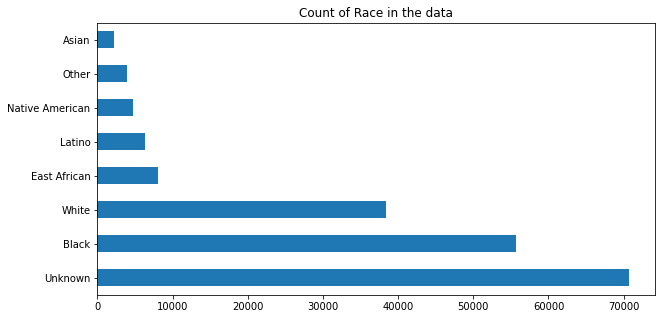

In [70]:
# Creates a bar plot of data where x axis is the count of occuriences in the data
# kind = type of bar plot barh is horizontal bar is vertical
pol_df.race.value_counts().plot(kind='barh', figsize=(10,5), title='Count of Race in the data')

<AxesSubplot:title={'center':'Count of Pre Race in the data'}>

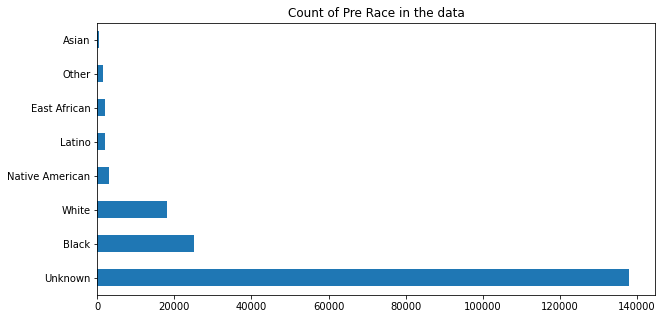

In [79]:
#pol_df.plot(y=['preRace','race'],kind='bar',figsize=(15,3), label=['preRace','race'],title='Count of PreRace and Race in the data')
pol_df.preRace.value_counts().plot(kind='barh', figsize=(10,5), title='Count of Pre Race in the data')